In [13]:
!pip install matplotlib seaborn nltk pandas

In [15]:
!pip install -U spacy

In [16]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 6.6 MB/s eta 0:00:02
     -------------- ------------------------- 4.7/12.8 MB 15.0 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 17.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 17.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install wordcloud 

  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


In [44]:
!pip install scikit-learn 

  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)


In [45]:
!pip install plotly

In [51]:
import numpy as np
import pandas as pd 
import re
import string
import nltk
nltk.download()
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [52]:
df = pd.read_csv(r"C:\Users\2000137985\OneDrive - Hexaware Technologies\Partha\Work\2024\Learning\FastAPI_PG\Indiaai_hackathon\resources\test.csv")
df.shape

(31229, 3)

In [53]:
df

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


In [55]:
df.describe()

,category,sub_category,crimeaditionalinfo
count,31229,28993,31222
unique,15,37,28785
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,18896,8890,753


In [56]:
df.columns

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [57]:
df.head(5)

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...


In [58]:
df.isnull().sum()

category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

We do have so many nulls in the sub_category

In [61]:
columns = ['category','sub_category']
for column in columns:
    print(f"{column} - {df[column].value_counts()}")
    print("----------------------------------------------------")

category - category
Online Financial Fraud                                  18896
Online and Social Media Related Crime                    4139
Any Other Cyber Crime                                    3670
Cyber Attack/ Dependent Crimes                           1261
RapeGang Rape RGRSexually Abusive Content                 912
Sexually Obscene material                                 666
Hacking  Damage to computercomputer system etc            592
Sexually Explicit Act                                     535
Cryptocurrency Crime                                      166
Online Gambling  Betting                                  134
Child Pornography CPChild Sexual Abuse Material CSAM      123
Online Cyber Trafficking                                   61
Cyber Terrorism                                            52
Ransomware                                                 18
Crime Against Women & Children                              4
Name: count, dtype: int64
------------------------

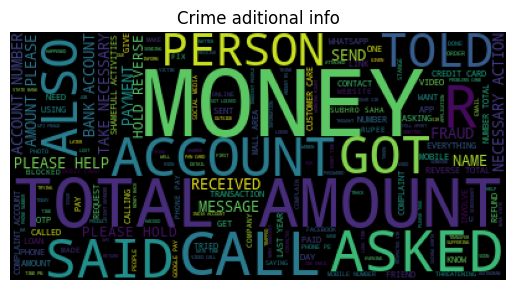

In [67]:
def cloud(text):
    try:
        text = text
    except Exception as e:
        text = str(text)
    wordcloud = WordCloud(stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Crime aditional info")
cloud(df['crimeaditionalinfo'].astype(str))